<H3> Python Project for Data Science - Final Assignment

In [5]:
!pip install yfinance
!pip install beautifulsoup
!pip install Pandas
!pip install matplotlib

  Using cached BeautifulSoup-3.2.2.tar.gz (32 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [7 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-p5qup_p_/beautifulsoup_83479a799c254444aee263a454a9aa65/setup.py", line 3
          "You're trying to run a very old release of Beautiful Soup under Python 3. This will not work."<>"Please use Beautiful Soup 4, available through the pip package 'beautifulsoup4'."
                                                                                                         ^^
      SyntaxError: invalid syntax
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating p

<H3> Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [16]:
import yfinance as yf

# Create a Ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Get historical stock data
tesla_data = tesla.history(period="max")

# Display the first few rows of the data
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


<H3> Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to download the webpage
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, "html.parser")

# Extract revenue data (example: assuming revenue is in a table)
revenue_table = soup.find_all("table")[1]  # Adjust index based on the webpage structure
tesla_revenue = pd.read_html(str(revenue_table))[0]
tesla_revenue.columns = ["Date", "Revenue"]

# Display the revenue data
print(tesla_revenue.tail())

          Date Revenue
49  2010-06-30     $28
50  2010-03-31     $21
51  2009-12-31     NaN
52  2009-09-30     $46
53  2009-06-30     $27


/tmp/ipykernel_301/2845612852.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(revenue_table))[0]


<h3> Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [8]:
import yfinance as yf

# Create a Ticker object for GameStop
gme = yf.Ticker("GME")

# Get historical stock data
gme_data = gme.history(period="max")

# Display the first few rows of the data
print(gme_data.head())

                               Open      High  ...  Dividends  Stock Splits
Date                                           ...                         
2002-02-13 00:00:00-05:00  1.620129  1.693350  ...        0.0           0.0
2002-02-14 00:00:00-05:00  1.712707  1.716074  ...        0.0           0.0
2002-02-15 00:00:00-05:00  1.683251  1.687459  ...        0.0           0.0
2002-02-19 00:00:00-05:00  1.666418  1.666418  ...        0.0           0.0
2002-02-20 00:00:00-05:00  1.615920  1.662210  ...        0.0           0.0

[5 rows x 7 columns]


<h3> Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [9]:
# Extract revenue data (example: assuming revenue is in a table)
revenue_table = soup.find_all("table")[1]  # Adjust index based on the webpage structure
gme_revenue = pd.read_html(str(revenue_table))[0]
gme_revenue.columns = ["Date", "Revenue"]

# Display the revenue data
print(gme_revenue.tail())

          Date Revenue
49  2010-06-30     $28
50  2010-03-31     $21
51  2009-12-31     NaN
52  2009-09-30     $46
53  2009-06-30     $27


/tmp/ipykernel_301/4087010334.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(revenue_table))[0]


<H2> Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

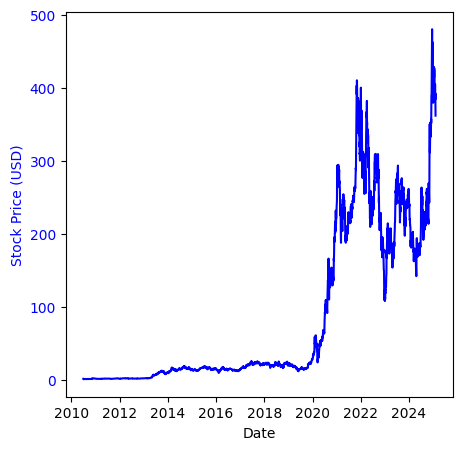

In [20]:
# Ensure the Date column is in datetime format
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_data.index = pd.to_datetime(tesla_data.index)  # Ensure stock data index is datetime

# Now try plotting again
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(5, 5))

# Tesla Stock Price (Left Y-Axis)
ax1.plot(tesla_data.index, tesla_data["Close"], label="Tesla Stock Price", color="blue")
ax1.set_xlabel("Date")
ax1.set_ylabel("Stock Price (USD)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")


<h2> Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

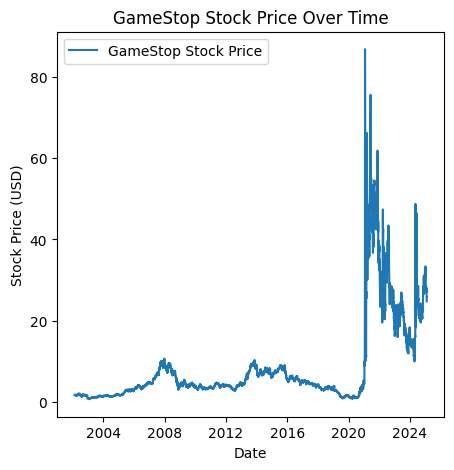

In [23]:
import matplotlib.pyplot as plt

# Plot GameStop stock data
plt.figure(figsize=(5, 5))
plt.plot(gme_data.index, gme_data["Close"], label="GameStop Stock Price")
plt.title("GameStop Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()

In [ ]:
<h2> 